In [1]:
#ColaboratoryかKaggleNotebookか判別
import sys
import os
from pathlib import Path

if 'google.colab' in sys.modules:  # colab環境
    INPUT = Path('/content/input/')

    # drive mount
    from google.colab import drive
    drive.mount('/content/drive/')

    # working dir に移動
    os.chdir('/content/drive/MyDrive/git/kaggle-inclass-mnesframingham')
    print("cwd:", os.getcwd())
    
elif 'kaggle_web_client' in sys.modules:  # kaggle環境
    INPUT = Path('../input/')


Mounted at /content/drive/
cwd: /content/drive/MyDrive/git/kaggle-inclass-mnesframingham


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
train = pd.read_feather('./data/interim/train.feather').drop("index",axis=1)
test = pd.read_feather('./data/interim/test.feather').drop("index",axis=1)

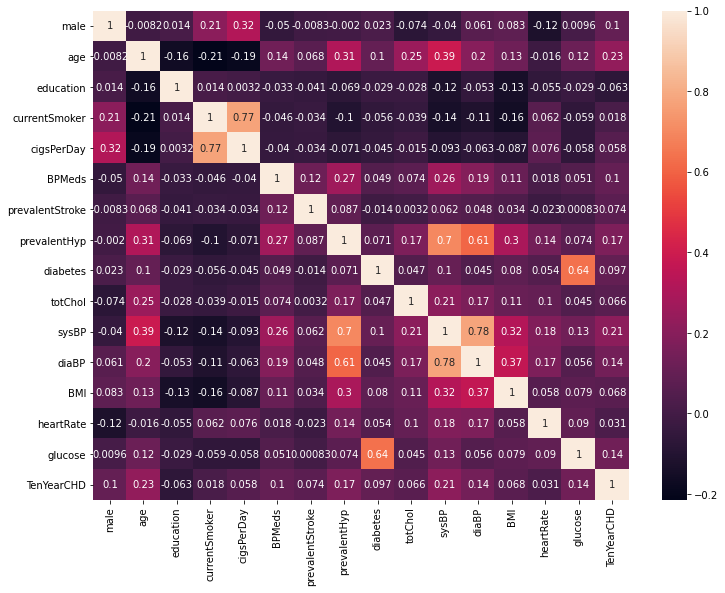

In [4]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train.corr(), annot=True, ax=ax)

# poly 2d から
23    1.0                   age diabetes
24    2.6                           male
25    4.8                 diabetes sysBP(diabetes0.65 * sysBP)
26    5.0                 diabetes diaBP(diabetes0.65 * diaBP)
27    8.2             prevalentHyp diaBP(noprevalentHyp0.85 * diaBP)
28    9.4              age currentSmoker
29   11.0            currentSmoker sysBP(nosmoker0.92* sysBP)
30   16.8                        diaBP^2
31   17.0             prevalentHyp sysBP(noprevalentHyp0.85 * sysBP)
34   38.0            currentSmoker diaBP(nosmoker0.92* diaBP)
35   44.6                          age^2
36   44.8                     male diaBP(female0.8 * diaBP)
37   45.0               age prevalentHyp(age noprevalentHyp0.85)
38   50.8             male currentSmoker(無しでも良いかも)
39   55.0                       male age(female0.85 * age)
44   82.2                      age diaBP(age**2 diaB)
48  158.0                     male sysBP(female0.8 * sysBP)
50  355.0                      age sysBP(そのまま）

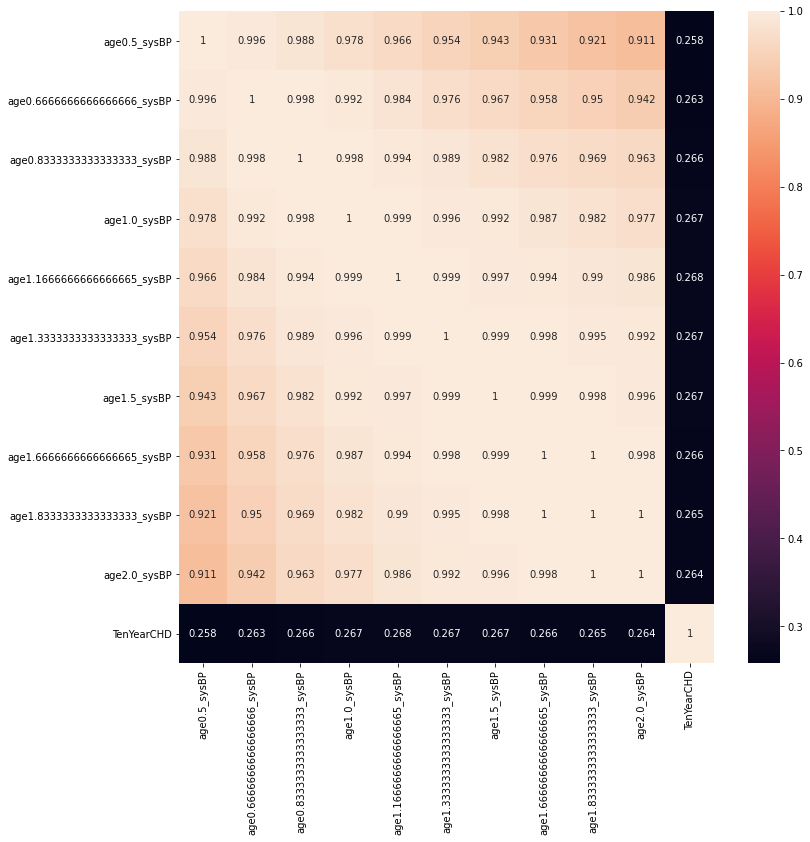

In [15]:
# age sysBP
df = pd.DataFrame()
col1 = np.linspace(0.5, 2, 10)
for i in col1:
    df[f"age{i}_sysBP"] = train["age"]**i * train["sysBP"]
df["TenYearCHD"] = train["TenYearCHD"]


f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.3g', ax=ax)

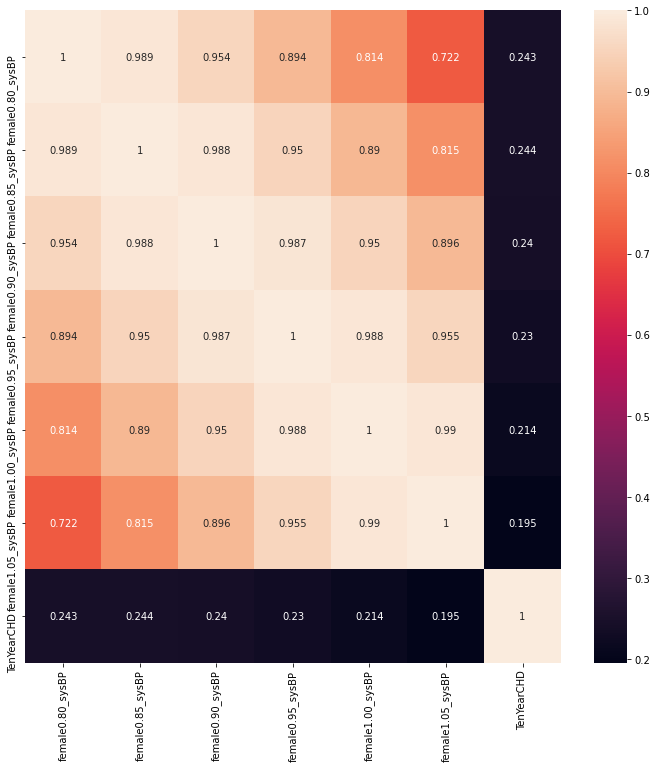

In [30]:
# male sysBP

df = pd.DataFrame()
female_coef = [i*0.01 for i in range(80, 110, 5)]
for i in female_coef:
    female = train["male"].copy()
    female[female==0] = i
    df[f"female{i:.2f}_sysBP"] = female *  train["sysBP"]
df["TenYearCHD"] = train["TenYearCHD"]

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.3g', ax=ax)

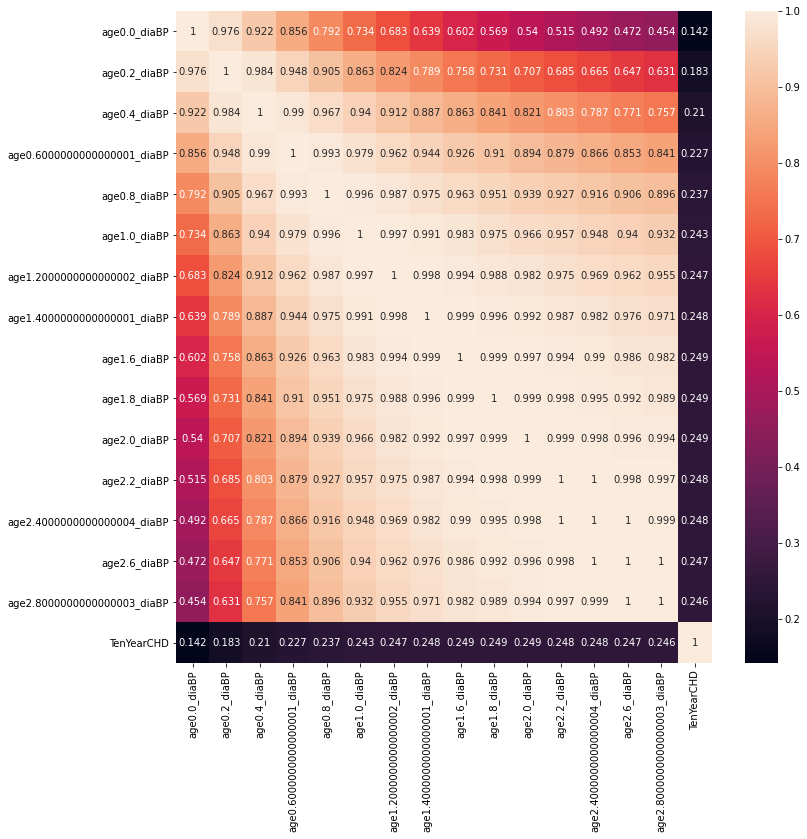

In [19]:
# age diaBP
df = pd.DataFrame()
col1 = [i*0.1 for i in range(0, 30, 2)]
for i in col1:
    df[f"age{i}_diaBP"] = train["age"]**i * train["diaBP"]
df["TenYearCHD"] = train["TenYearCHD"]

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.3g', ax=ax)

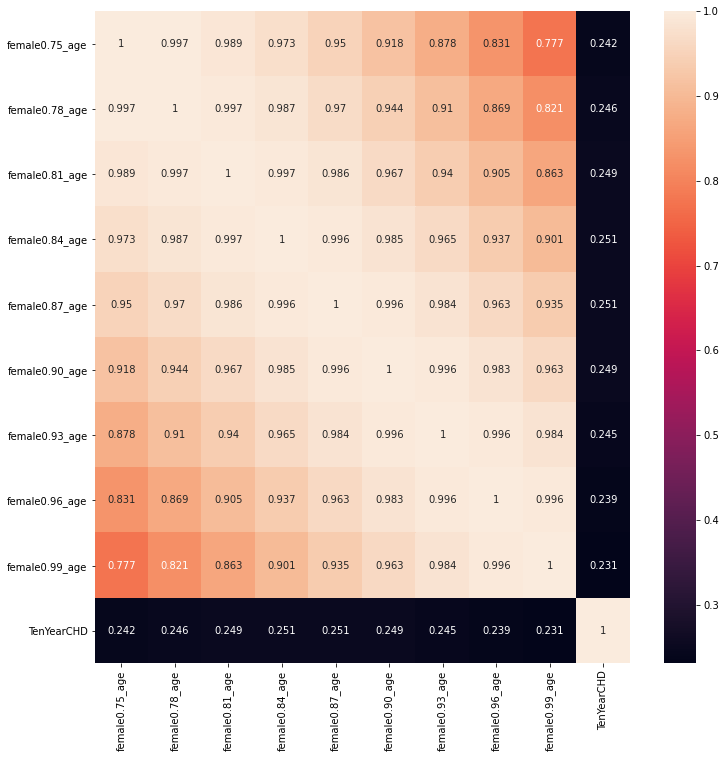

In [32]:
# male age
df = pd.DataFrame()
female_coef = [i*0.01 for i in range(75, 100, 3)]
for i in female_coef:
    female = train["male"].copy()
    female[female==0] = i
    df[f"female{i:.2f}_age"] = female *  train["age"]
df["TenYearCHD"] = train["TenYearCHD"]

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.3g', ax=ax)

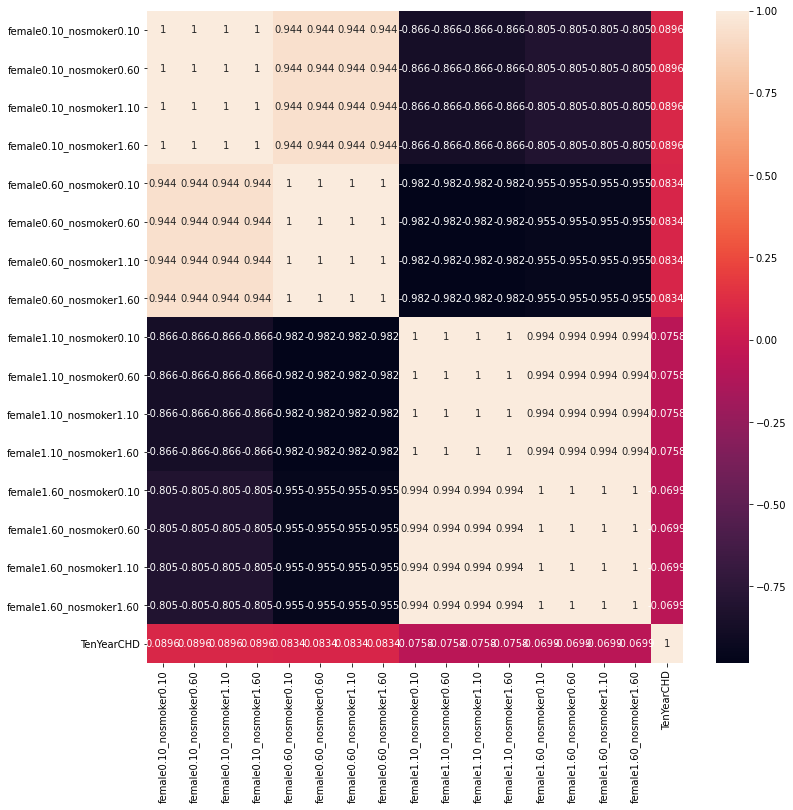

In [35]:
# male currentSmoker
df = pd.DataFrame()
female_coef = [i*0.01 for i in range(10, 200, 50)]
nosmoker_coef = [i*0.01 for i in range(10, 200, 50)]
for i in female_coef:
  for j in nosmoker_coef:
    female = train["male"].copy()
    female[female==0] = i
    nosmoker = train["currentSmoker"].copy()
    nosmoker[nosmoker==0] = i
    df[f"female{i:.2f}_nosmoker{j:.2f}"] = female *  nosmoker
df["TenYearCHD"] = train["TenYearCHD"]

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.3g', ax=ax)



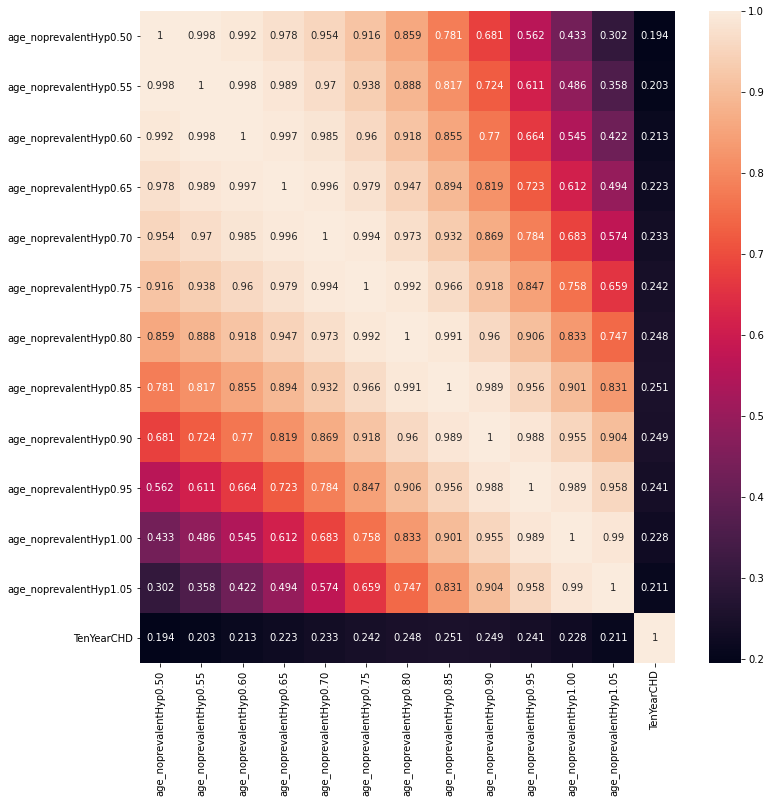

In [45]:
# age prevalentHyp
df = pd.DataFrame()
noprevalentHyp_coef = [i*0.01 for i in range(50, 110, 5)]
for i in noprevalentHyp_coef:
    noprevalentHyp = train["male"].copy()
    noprevalentHyp[noprevalentHyp==0] = i
    df[f"age_noprevalentHyp{i:.2f}"] = train["age"] * noprevalentHyp
df["TenYearCHD"] = train["TenYearCHD"]

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.3g', ax=ax)


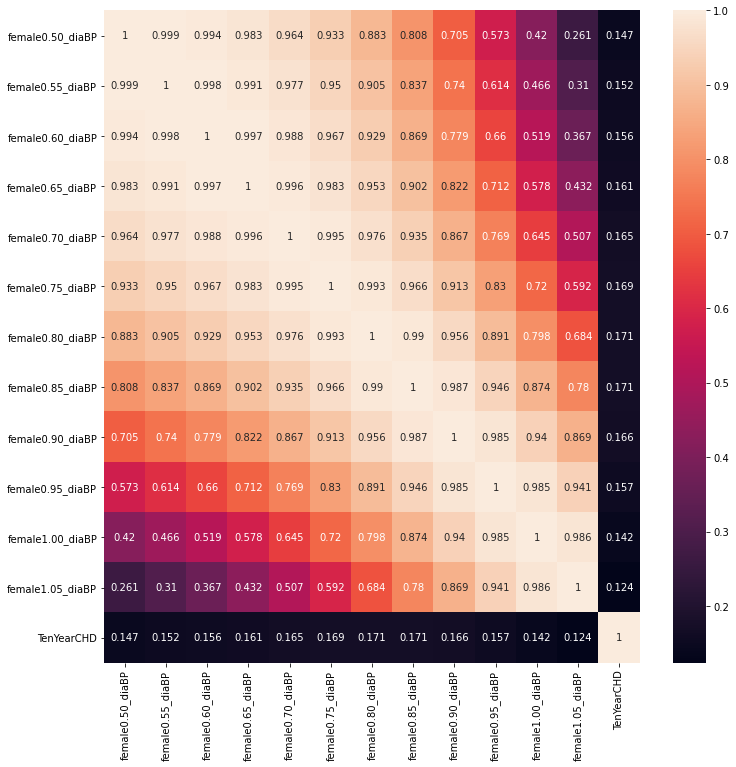

In [39]:
# male diaBP

df = pd.DataFrame()
female_coef = [i*0.01 for i in range(50, 110, 5)]
for i in female_coef:
    female = train["male"].copy()
    female[female==0] = i
    df[f"female{i:.2f}_diaBP"] = female *  train["diaBP"]
df["TenYearCHD"] = train["TenYearCHD"]

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.3g', ax=ax)

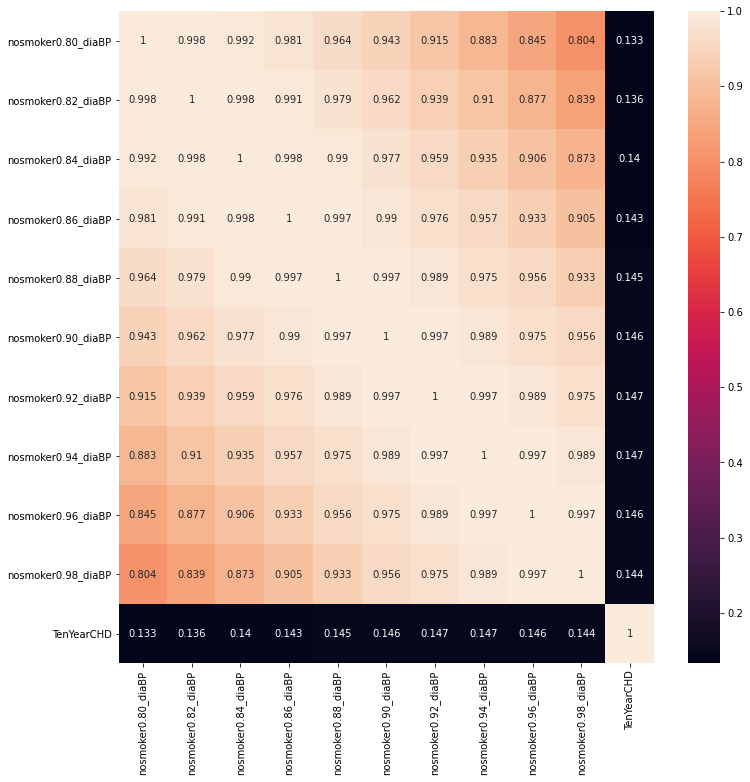

In [43]:
# currentSmoker diaBP

df = pd.DataFrame()
nosmoker_coef = [i*0.01 for i in range(80, 100, 2)]
for i in nosmoker_coef:
    nosmoker = train["currentSmoker"].copy()
    nosmoker[nosmoker==0] = i
    df[f"nosmoker{i:.2f}_diaBP"] = nosmoker *  train["diaBP"]
df["TenYearCHD"] = train["TenYearCHD"]

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.3g', ax=ax)



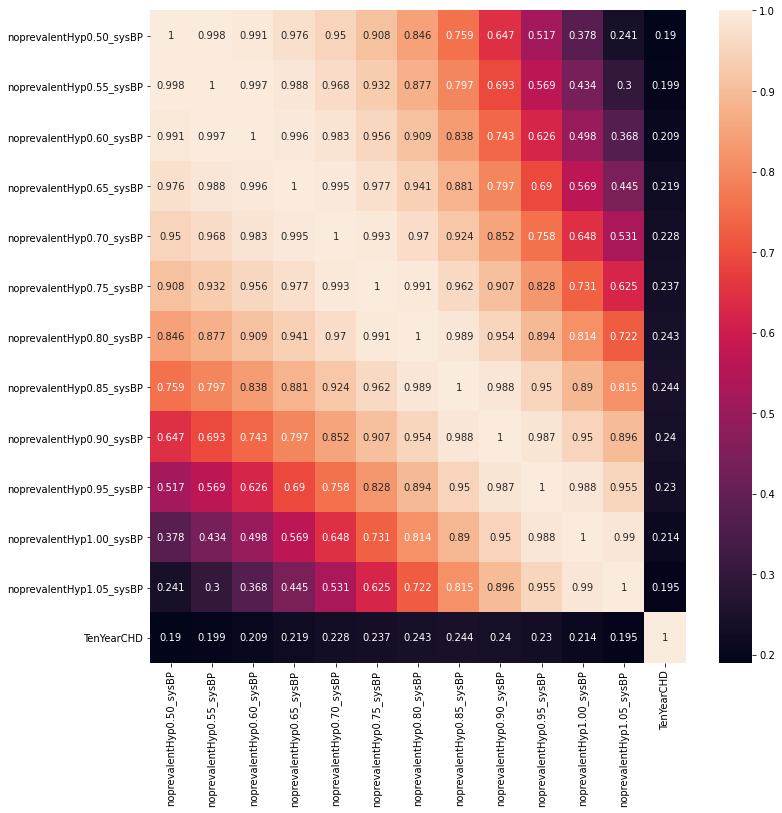

In [46]:
# prevalentHyp sysBP

df = pd.DataFrame()
noprevalentHyp_coef = [i*0.01 for i in range(50, 110, 5)]
for i in noprevalentHyp_coef:
    noprevalentHyp = train["male"].copy()
    noprevalentHyp[noprevalentHyp==0] = i
    df[f"noprevalentHyp{i:.2f}_sysBP"] = noprevalentHyp * train["sysBP"]
df["TenYearCHD"] = train["TenYearCHD"]

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.3g', ax=ax)

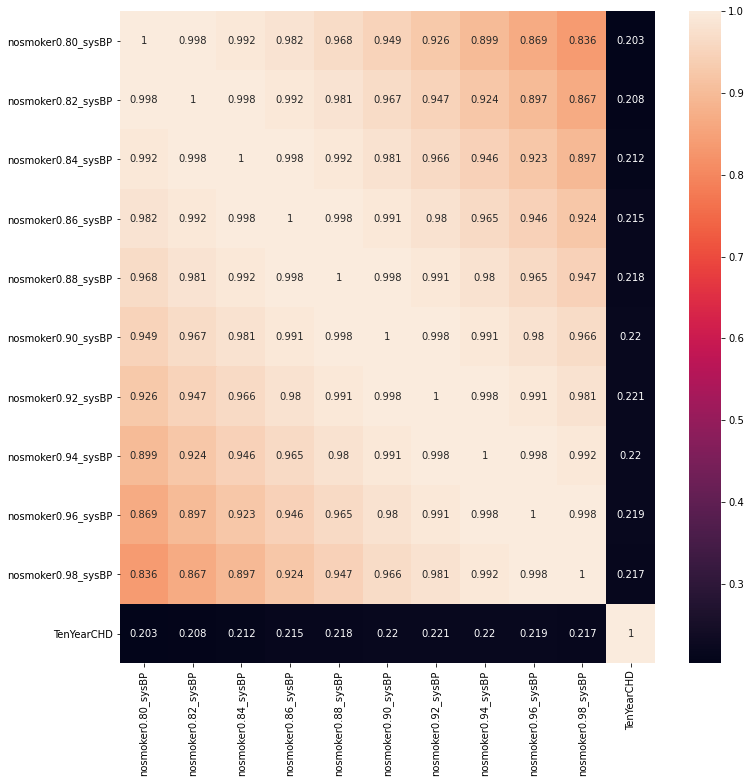

In [47]:
# currentSmoker sysBP
df = pd.DataFrame()
nosmoker_coef = [i*0.01 for i in range(80, 100, 2)]
for i in nosmoker_coef:
    nosmoker = train["currentSmoker"].copy()
    nosmoker[nosmoker==0] = i
    df[f"nosmoker{i:.2f}_sysBP"] = nosmoker *  train["sysBP"]
df["TenYearCHD"] = train["TenYearCHD"]

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.3g', ax=ax)


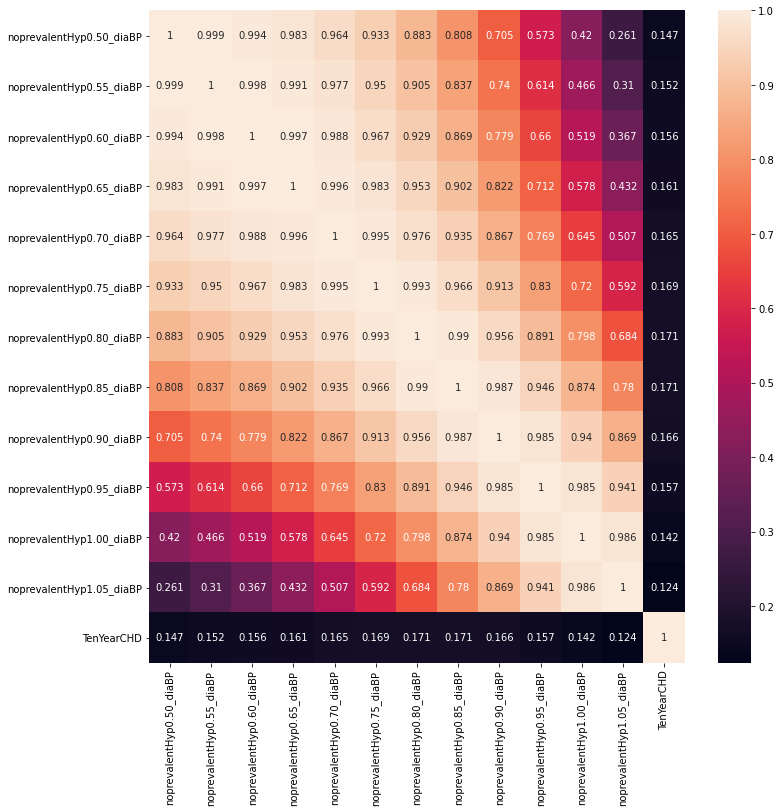

In [48]:
# prevalentHyp diaBP

df = pd.DataFrame()
noprevalentHyp_coef = [i*0.01 for i in range(50, 110, 5)]
for i in noprevalentHyp_coef:
    noprevalentHyp = train["male"].copy()
    noprevalentHyp[noprevalentHyp==0] = i
    df[f"noprevalentHyp{i:.2f}_diaBP"] = noprevalentHyp * train["diaBP"]
df["TenYearCHD"] = train["TenYearCHD"]

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.3g', ax=ax)

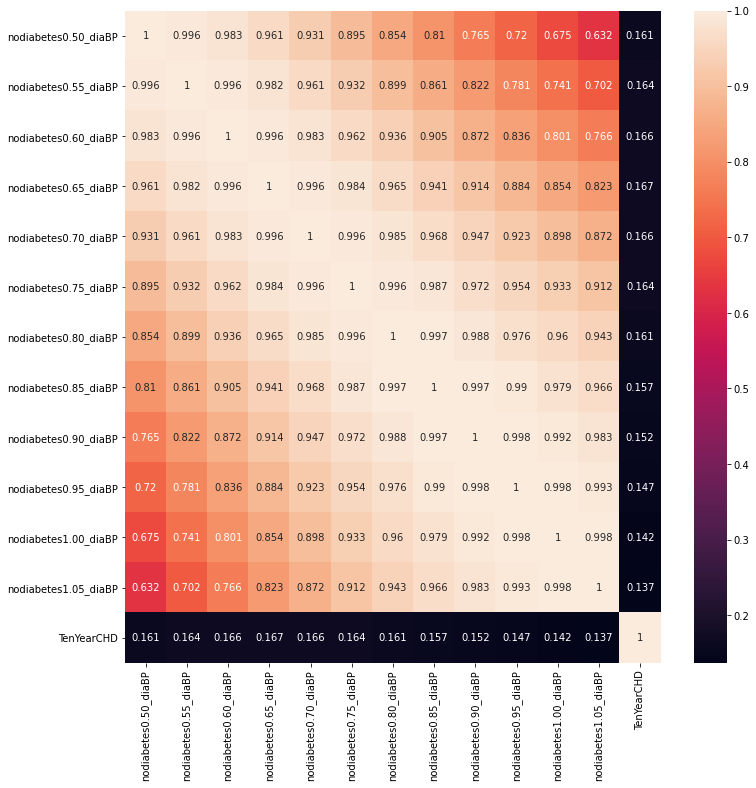

In [49]:
# diabetes diaBP
df = pd.DataFrame()
nodiabetes_coef = [i*0.01 for i in range(50, 110, 5)]
for i in nodiabetes_coef:
    nodiabetes = train["diabetes"].copy()
    nodiabetes[nodiabetes==0] = i
    df[f"nodiabetes{i:.2f}_diaBP"] = nodiabetes * train["diaBP"]
df["TenYearCHD"] = train["TenYearCHD"]

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.3g', ax=ax)